In [34]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [50]:
RESULT_HEADER = ['Init_station','Init_time', 'Tick_length','Init_count',
                 'Travel_period','Count_type']
# INDEX = ['Init_station','Init_time','Init_count','Count_type']
results = pd.DataFrame(np.load('travel_periods.npy'))
timesteps = len(results.columns) - len(RESULT_HEADER)
results.columns = RESULT_HEADER + list(range(timesteps))
# results.drop(columns=['Travel_period', 'Tick_length'], inplace=True)
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(RESULT_HEADER, inplace=True)
results.head()

0     \
Init_station Init_time Tick_length Init_count Travel_period Count_type              
121.0        3.0       1.0         1.0        0.0           S           7947054.0   
                                                            I                 1.0   
                                                            R                 0.0   
                                                            N           7947055.0   
                                              24.0          S           7947054.0   

                                                                                1     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.006942e+00   
                                                            R           1.388889e-02   
                                                            N           7.947055e+06   
                                              24.0          S           7.947054e+06   

                                                                                2     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.013933e+00   
                                                            R           2.787420e-02   
                                                            N           7.947055e+06   
                                              24.0          S           7.947054e+06   

                                                                                3     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.020971e+00   
                                                            R           4.195659e-02   
                                                            N           7.947055e+06   
                                              24.0          S           7.947054e+06   

                                                                                4     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.028059e+00   
                                                            R           5.613675e-02   
                                                            N           7.947055e+06   
                                              24.0          S           7.947054e+06   

                                                                                5     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.035196e+00   
                                                            R           7.041535e-02   
                                                            N           7.947055e+06   
                                              24.0          S           7.947054e+06   

                                                                                6     \
Init_station Init_time Tick_length Init_count Travel_period Count_type                 
121.0        3.0       1.0         1.0        0.0           S           7.947054e+06   
                                                            I           1.042382e+00   
                                            

In [37]:
I_cols = results.xs('I', level='Count_type').T
R_cols = results.xs('R', level='Count_type').T

In [49]:
I_cols = results.xs(('I', 121),
                    level=('Count_type', 'Init_station')).T

In [45]:
I_cols[1500:].head()

Init_time             3.0                            
Tick_length           1.0                            
Init_count            1.0                            
Travel_period        0.0           24.0           NaN
1500           245.611008  30299.615629  30563.136170
1501           244.599359  30499.880803  30766.063617
1502           243.590555  30701.412649  30970.276531
1503           242.584602  30904.219118  31175.782187
1504           241.581506  31108.309477  31382.588103

In [46]:
I_cols.max()

Init_time  Tick_length  Init_count  Travel_period
3.0        1.0          1.0         0.0                 585.225650
                                    24.0             450557.113035
                                    NaN              450119.357544
dtype: float64

In [52]:
results.xs(('I',), level=('Count_type',)).T.max()

Init_station  Init_time  Tick_length  Init_count  Travel_period
121.0         3.0        1.0          1.0         0.0                 585.225650
                                                  24.0             450557.113035
                                                  NaN              450119.357544
375.0         3.0        1.0          1.0         0.0                 543.017011
                                                  24.0             449601.862245
                                                  NaN              448587.132320
6.0           3.0        1.0          1.0         0.0                 724.679406
                                                  24.0             455400.700089
                                                  NaN              453499.073411
341.0         3.0        1.0          1.0         0.0                1547.953130
                                                  24.0             452101.196980
                                             

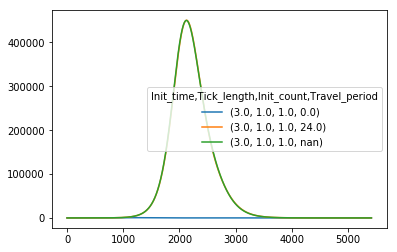

In [42]:
I_cols.drop(colplot()

In [7]:
peaks = pd.concat([I_cols.idxmax(), I_cols.T.max(), R_cols.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24

# Hypothesis: this is a pure SIR model

## Calculate SIR
Based on [SciPy book](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

In [8]:
import numpy as np
from scipy.integrate import odeint, solve_ivp 

In [9]:
int(np.float64(1.5))

1

In [10]:
# Total population
N = results.xs((1, 'S'), level=('Tick_length', 'Count_type'))[0] + 1
# Initial conditions
I0, R0 = 1, 0
S0 = N - I0 - R0
from simulate import BETA, GAMMA
# A grid of time points (in hours)
max_time = len(I_cols[1])
t = np.linspace(0, max_time, max_time)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, BETA, GAMMA))
S, I, R = ret.T

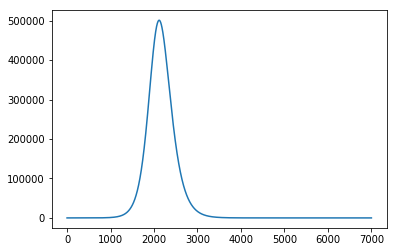

In [11]:
plt.plot(t, I)
plt.show()

In [12]:
for name, series in zip(('S', 'I', 'R'), (S, I, R)):
    results = results.append(pd.Series(series, name=(-1, name)))

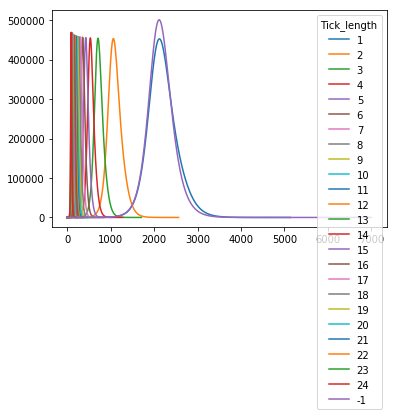

In [13]:
results.xs('I', level='Count_type').T.plot()